# Steps –

# Import libraries and read the dataset.
# Explore Data Analysis. Find out how one variable related to other and distributions of data.
# State your insights.
# Build a linear regression model to predict the house prices
# Try to find out important features or create new features to improve the performance for your model.
# Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

# -------------------------------------------- 1 ----------------------------------------------------------
#    Import libraries and read the dataset.

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
from sklearn import metrics
from pandas.tools.plotting import scatter_matrix
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load dataset
data = pd.read_csv('kc_house_data.csv')

# -------------------------------------------- 2 ----------------------------------------------------------
# Explore Data Analysis. Find out how one variable related to other and distributions of data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# At a first glance, ID ,date and zipcode can be removed as it serves unsignificant value . The features seem to be pre-selected as important influencers for a sale price of a house.

In [6]:
columns_drop=data.columns[[0,1,16]]
data.drop(columns_drop, axis=1,inplace=True)

In [7]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540088.141767,367127.196483,75000.0000,321950.000,450000.0000,645000.000,7.700000e+06
bedrooms,21613.0,3.370842,0.930062,0.0000,3.000,3.0000,4.000,3.300000e+01
bathrooms,21613.0,2.114757,0.770163,0.0000,1.750,2.2500,2.500,8.000000e+00
sqft_living,21613.0,2079.899736,918.440897,290.0000,1427.000,1910.0000,2550.000,1.354000e+04
sqft_lot,21613.0,15106.967566,41420.511515,520.0000,5040.000,7618.0000,10688.000,1.651359e+06
floors,21613.0,1.494309,0.539989,1.0000,1.000,1.5000,2.000,3.500000e+00
waterfront,21613.0,0.007542,0.086517,0.0000,0.000,0.0000,0.000,1.000000e+00
view,21613.0,0.234303,0.766318,0.0000,0.000,0.0000,0.000,4.000000e+00
condition,21613.0,3.409430,0.650743,1.0000,3.000,3.0000,4.000,5.000000e+00
grade,21613.0,7.656873,1.175459,1.0000,7.000,7.0000,8.000,1.300000e+01


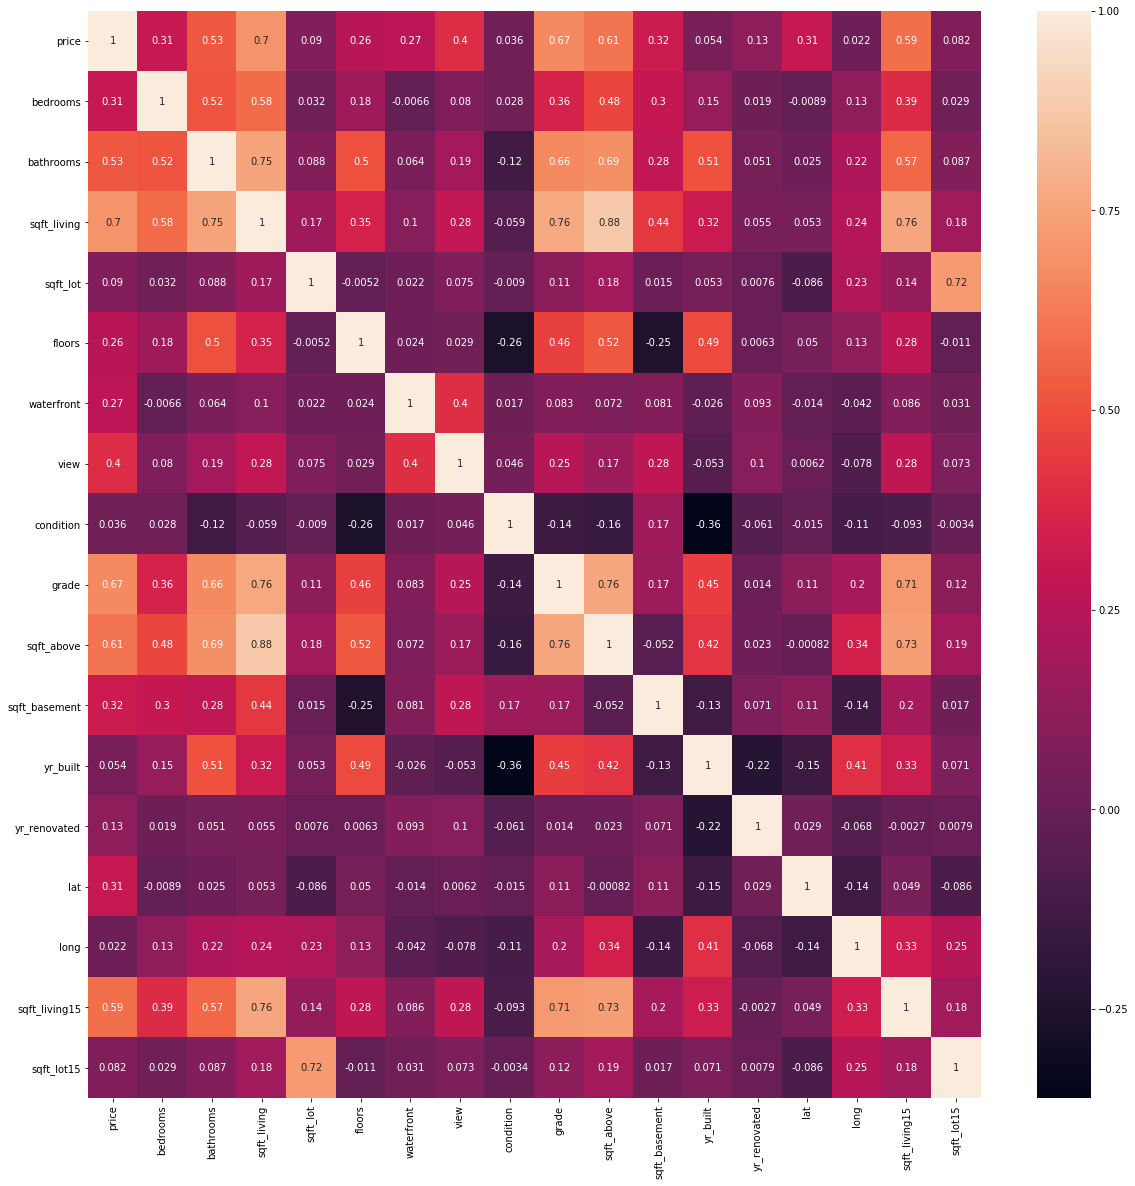

In [10]:
corrmat = data.corr()
plt.subplots(figsize = (20,20))
sns.heatmap(corrmat, annot=True)

In [11]:
data.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64

# Data Visualizations

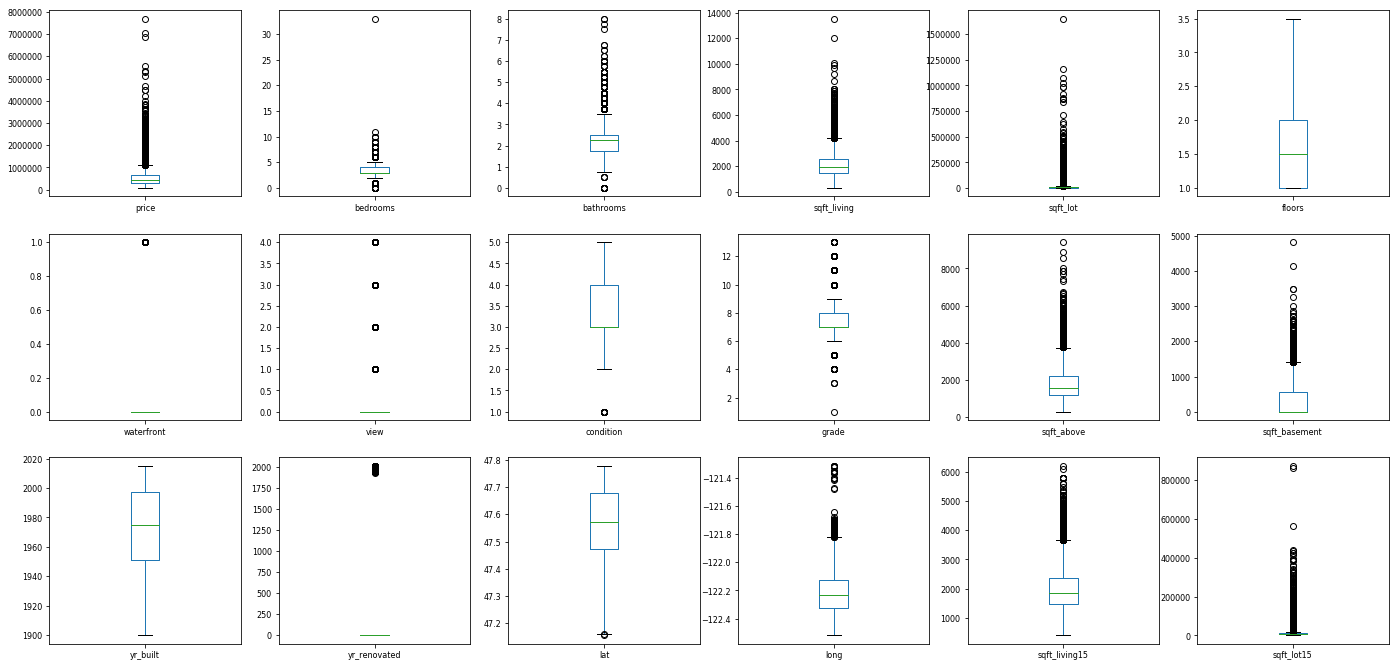

In [13]:
# box and whisker plots
data.plot(kind='box', subplots=True, layout=(6,6), fontsize=8, figsize=(24,24))
plt.show()

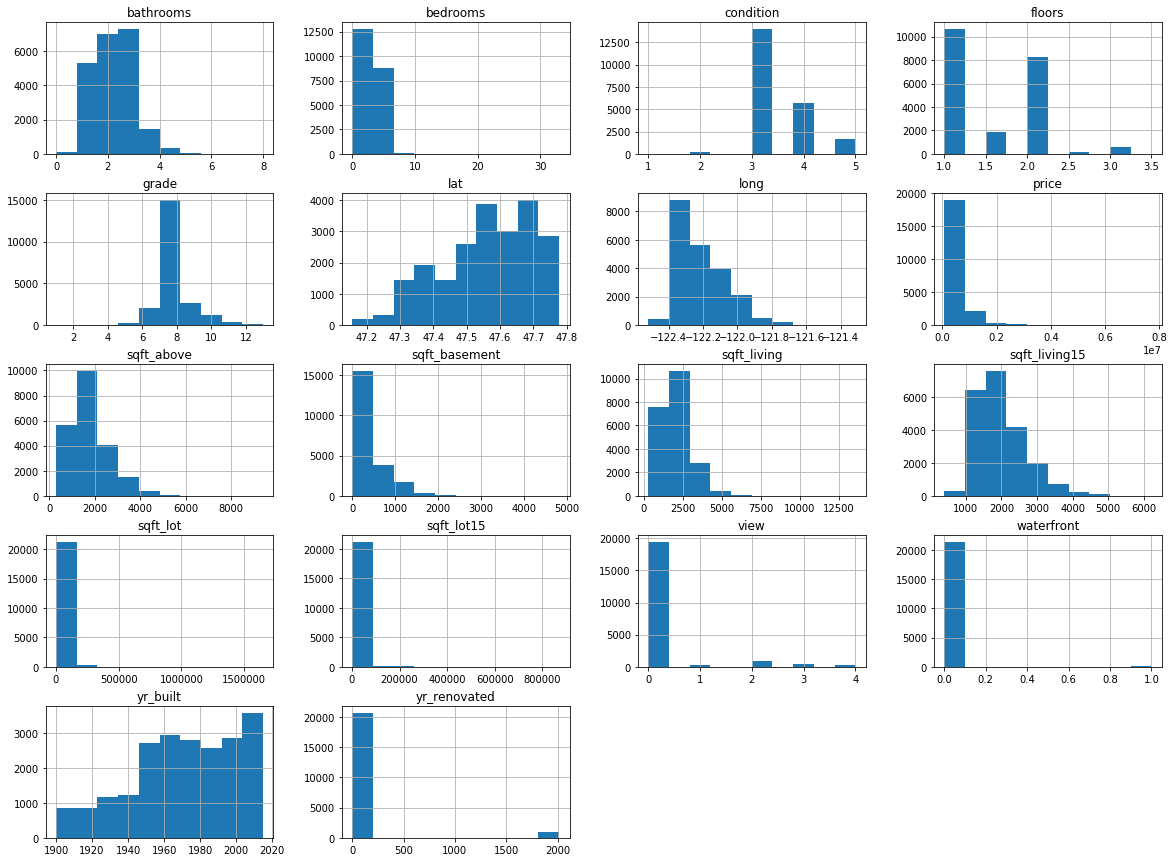

In [14]:
data.hist(figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

# -------------------------------------------- 3 ----------------------------------------------------------
# State your insights

In [15]:
# Insights
# Sqft living and bathrooms are having correlation 0.75
# Sqft Living and Sqft above are having correlation 0.88
# Sqft Living and Grade  are having correlation 0.76
# Sqft Living and sqft living 15  are having correlation 0.76

In [16]:
#  Waterfront,Yr_Renovated has lot of zero values. 

# -------------------------------------------- 4 ----------------------------------------------------------
# Build a linear regression model to predict the house prices

In [17]:
X = data.drop(['price'], axis=1)
y = data[['price']]

model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
y_pred = model.predict(X_test)
print('Liner Regression R squared: %.4f' % model.score(X_test, y_test))

Liner Regression R squared: 0.7040


In [19]:
#This means the given input covers 70% of the variability in the data

In [20]:
#calculating rmse
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 202604.8178


In [21]:
# Our model was able to predict the value of every house in the test set within $202604.81 of the real price.

# -------------------------------------------- 5 ----------------------------------------------------------
# Try to find out important features or create new features to improve the performance for your model.

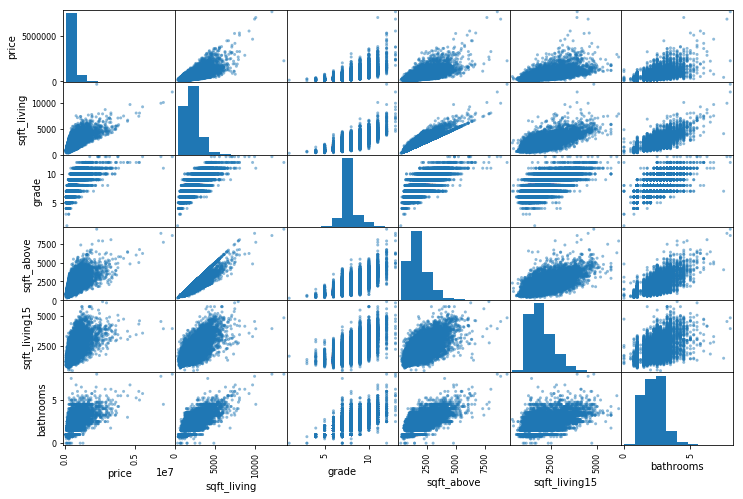

In [22]:
attributes = ["price", "sqft_living", "grade", "sqft_above","sqft_living15","bathrooms"]
scatter_matrix(data[attributes], figsize=(12, 8))
plt.savefig('matrix.png')

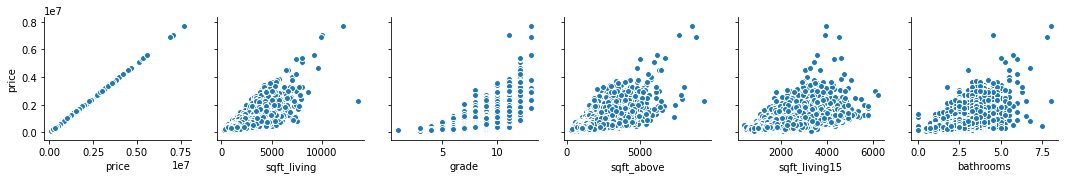

In [23]:
#We will just focus on a few promising variables, that seem the most correlated with the price.
pp = sns.pairplot(data,
                  y_vars=['price'],
                  x_vars=attributes)
pp

In [24]:
#cost per sqft is an important parameter that incorporates the size vs cost. So lets add cost_per_sqft
data['cost_per_sqft'] = data['price']/data['sqft_living'] 

In [25]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,cost_per_sqft
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,188.050847
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,209.338521
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,233.766234
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,308.163265
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,303.571429


In [26]:
corr_matrix = data.corr()
corr_matrix["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
cost_per_sqft    0.554703
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
Name: price, dtype: float64

In [27]:
#Going by the correlation we can drop last few columns and those are : sqft_basement,bedrooms,lat,waterfront,floors,yr_renovated,sqft_lot,sqft_lot15,yr_built,condition,long,date   
drop_columns = ['sqft_basement','bedrooms','lat','waterfront','floors','yr_renovated','sqft_lot','sqft_lot15','yr_built','condition','long']             
data.drop(drop_columns,axis=1,inplace=True)

In [28]:
data.head()

,price,bathrooms,sqft_living,view,grade,sqft_above,sqft_living15,cost_per_sqft
0,221900.0,1.00,1180,0,7,1180,1340,188.050847
1,538000.0,2.25,2570,0,7,2170,1690,209.338521
2,180000.0,1.00,770,0,6,770,2720,233.766234
3,604000.0,3.00,1960,0,7,1050,1360,308.163265
4,510000.0,2.00,1680,0,8,1680,1800,303.571429


In [29]:
X = data.drop('price',axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [30]:
y_pred = regressor.predict(X_test)
print('Liner Regression R squared: %.4f' % regressor.score(X_test, y_test))

Liner Regression R squared: 0.8772


In [31]:
#This means the given input covers 87% of the variability in the data

In [32]:
#calculating rmse
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 129850.0795


In [33]:
# Our model was able to predict the value of every house in the test set within $129850 of the real price.

In [34]:
#sfs1 = sfs(linR, k_features=5, forward=False, scoring='r2', cv=5)

# -------------------------------------------- 6 ----------------------------------------------------------
# Use appropriate cross validations techniques to find out the best predictor parameters and best prediction.

In [117]:
# Lets use the cross validation techniques to identify the best prediction

# Evaluate using Cross Validation
from sklearn import model_selection
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = LinearRegression()
X=data.drop('price',axis=1)
y= data[['price']]
scaler = StandardScaler()
scaled_data_x = scaler.fit_transform(X)
results = model_selection.cross_val_score(model, scaled_data_x, y, scoring='r2', cv=kfold)
print("R^2: %.3f (%.3f)" % (results.mean(), results.std()))

R^2: 0.883 (0.014)


In [32]:
#sfs1 = sfs1.fit(X_train.values, Y_train.values)

In [33]:
#sfs1.get_metric_dict()

{18: {'feature_idx': (0,
   1,
   2,
   3,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17),
  'cv_scores': array([0.69292922, 0.69576937, 0.6898323 , 0.70112842, 0.71946354]),
  'avg_score': 0.6998245691018097,
  'feature_names': ('0',
   '1',
   '2',
   '3',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17'),
  'ci_bound': 0.01349525034821994,
  'std_dev': 0.010499763248924342,
  'std_err': 0.005249881624462171},
 17: {'feature_idx': (0,
   1,
   2,
   4,
   5,
   6,
   7,
   8,
   9,
   10,
   11,
   12,
   13,
   14,
   15,
   16,
   17),
  'cv_scores': array([0.692836  , 0.69572464, 0.68974073, 0.70111416, 0.71973824]),
  'avg_score': 0.6998307559969874,
  'feature_names': ('0',
   '1',
   '2',
   '4',
   '5',
   '6',
   '7',
   '8',
   '9',
   '10',
   '11',
   '12',
   '13',
   '14',
   '15',
   '16',
   '17'),
  'ci_bound': 0.013669484179696281,
  'std_dev': 0.0106353

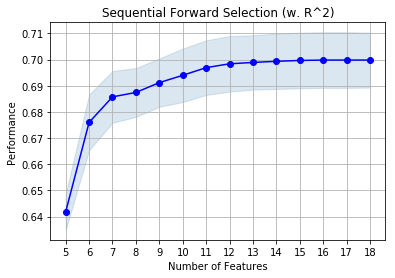

In [39]:
#fig = plot_sfs(sfs1.get_metric_dict())

#plt.title('Sequential Forward Selection (w. R^2)')
#plt.grid()
#plt.show()

In [119]:
# Which features?
columnList = list(X_train.columns)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[8, 9, 10, 11, 14]
